# Analyzing The Rich

> Author: Saad Elbeleidy

> Data: [Forbes Billionaires List](http://www.forbes.com/billionaires/list)

This post explores some questions about the richest people alive. The data was collected from the [Forbes Billionaires List](http://www.forbes.com/billionaires/list). You can go to that site, scroll down, select all and copy into a tsv file. After some minor formatting edits you can see a file similar to the one called `raw.tsv` in the repo/folder.

The analysis aims to explore a few questions that I have about the dataset.

* How many billionaires are there? How does that amount compare to the rest of the world?
* How much money does the average/median billionaire have? How much do they all have combined? How does that compare to countries' GDPs, fortune 500 companies? How do they compare to each other?
* Which country has the most billionaires and how do they compare?
* Which country has the most money if we add all their billionaires together and how do they compare?
* How does age correlate to how rich you are given that you are a billionaire? What is the distribution of billionaire's ages?
* How does industry correlate to how rich you are given that you are a billionaire, and which industries have the most billionaires?
* How does gender correlate? Which countries have the most female billionaires and which have the highest percentage of female billionaries?
* Given that I am a [gender] from [country], what industry would I have pursued if I was a billionaire? What is the mean, median age for those billionaires?


In [188]:
## Getting the data and setting things up
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig_size =[0,0]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

billionaires = pd.read_csv('raw.tsv', sep='\t', header=0)
womenBillionaires = pd.read_csv('raw_women.tsv', sep='\t', header=0)

billionaires['Net Worth'] = pd.to_numeric(billionaires['Net Worth'].map(lambda x: x[1:len(x)-1]))
womenBillionaires['Net Worth'] = pd.to_numeric(womenBillionaires['Net Worth'].map(lambda x: x[1:len(x)-1]))
billionaires['Age'] = pd.to_numeric(billionaires['Age'],errors='coerce')
womenBillionaires['Age'] = pd.to_numeric(womenBillionaires['Age'],errors='coerce')

billionaires.head()

,Rank,Name,Net Worth,Age,Source,Country of Citizenship
0,1,Bill Gates,75.0,61.0,Microsoft,United States
1,2,Amancio Ortega,67.0,80.0,Zara,Spain
2,3,Warren Buffett,60.8,86.0,Berkshire Hathaway,United States
3,4,Carlos Slim Helu,50.0,76.0,telecom,Mexico
4,5,Jeff Bezos,45.2,52.0,Amazon.com,United States


In [189]:
billionaires.tail()

,Rank,Name,Net Worth,Age,Source,Country of Citizenship
1805,1694,Zeng Kaitian,1.0,42.0,online games,China
1806,1694,Zhang Keqiang,1.0,56.0,real estate,China
1807,1694,Zhang Wanzhen,1.0,67.0,advanced ceramics,China
1808,1694,Zhou Yaoting,1.0,73.0,"apparel, real estate",China
1809,1694,Zhuang Min,1.0,48.0,surveillance equipment,China


In [190]:
womenBillionaires.head()

,Rank,Name,Net Worth,Age,Source,Country of Citizenship
0,11,Liliane Bettencourt,36.1,94.0,L'Oreal,France
1,16,Alice Walton,32.3,67.0,Wal-Mart,United States
2,27,Jacqueline Mars,23.4,77.0,candy,United States
3,30,Maria Franca Fissolo,22.1,99.0,"Nutella, Chocolates",Italy
4,38,Susanne Klatten,18.5,54.0,"BMW, pharmaceuticals",Germany


## Billionaire Count

>How many billionaires are there? How does that amount compare to the rest of the world?

Some interesting values to compare this number to:

* Number of people in the world - [7,432,663,275](http://www.worldometers.info/world-population/)
* Number of people in poverty - [767,000,000](http://www.worldbank.org/en/publication/poverty-and-shared-prosperity) (2013)
* Number of people in Africa - [1,216,129,815](http://www.worldometers.info/world-population/africa-population/) (2016)
* Number of people in the most populated country - [1,382,323,332](http://www.worldometers.info/world-population/china-population/) (China 2016)
* Number of people in America - [324,118,787](http://www.worldometers.info/world-population/us-population/)
* Number of people in the most populated city - [38,000,000](http://www.newgeography.com/content/005219-largest-cities-world-2016) (Tokyo 2016 estimate)
* Number of people in Washington D.C. - [6,097,684](https://en.wikipedia.org/wiki/List_of_Metropolitan_Statistical_Areas#United_States) (2015 estimate)
* "The 1%"
* America's "1%"
* "The 0.1%"
* America's "0.1%"


An interesting value as well is to find out what that number is as a percentage of the world.

In [232]:
billionaireCount = len(billionaires)
print("There are {} billionaires".format(billionaireCount))

There are 1810 billionaires


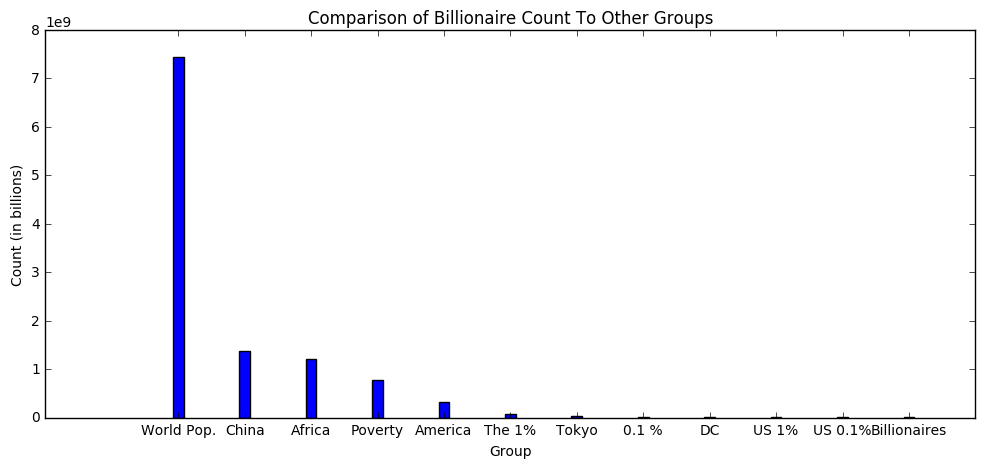

In [261]:
import math
# Assigning the values from the links
world = 7432663275
poverty = 767000000
africa = 1216129815
china = 1382323332
america = 324118787
tokyo = 38000000
dc = 6097684
onePercent = math.floor(0.01 * world)
americanOnePercent = math.floor(0.01* america)
pointOnePercent = math.floor(0.1* onePercent)
americanPointOnePercent = math.floor(0.1 * americanOnePercent)

values = {
    "Billionaires": len(billionaires),
    "World Pop.": world,
    "Poverty": poverty,
    "Africa": africa,
    "China": china,
    "America": america,
    "Tokyo": tokyo,
    "DC": dc,
    "The 1%": onePercent,
    "US 1%": americanOnePercent,
    "0.1 %": pointOnePercent,
    "US 0.1%": americanPointOnePercent
}

import operator
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(0,len(values)*5, 5), sorted_values[:,1].astype(int), align='center')
plt.xticks(range(0,len(values)*5, 5), sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count (in billions)")

plt.show()

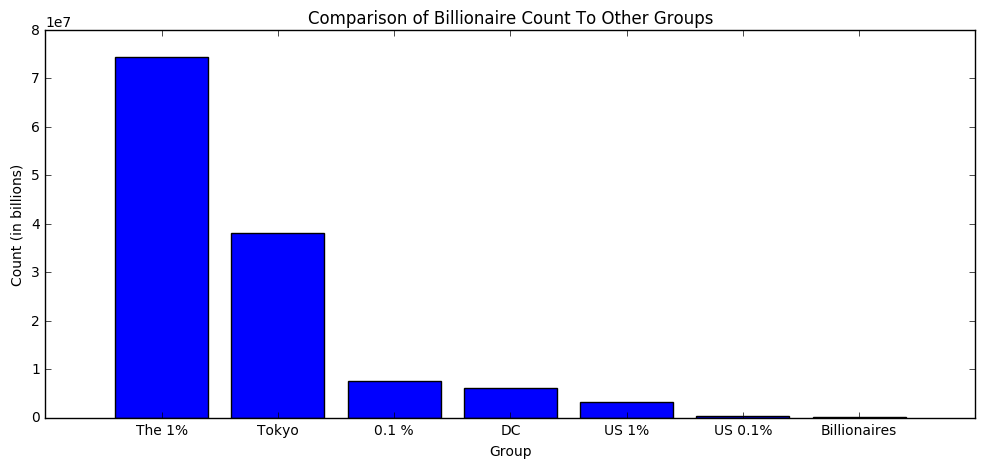

In [195]:
low_sorted_values = sorted_values[5:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count (in billions)")

plt.show()

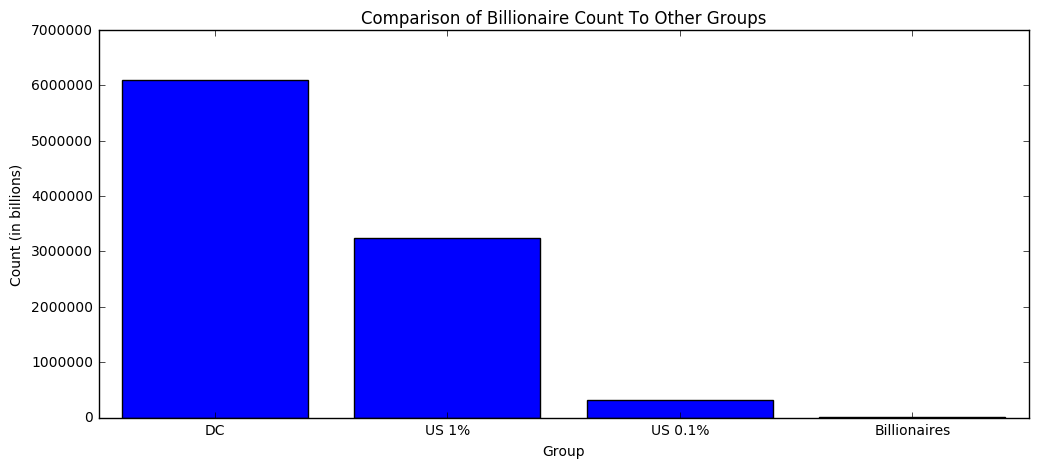

In [196]:
low_sorted_values = sorted_values[8:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count")

plt.show()

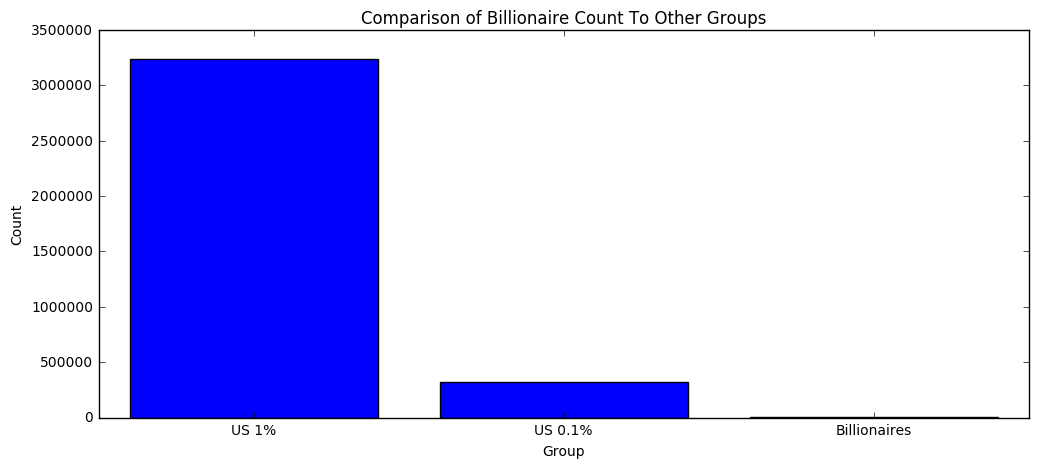

In [197]:
low_sorted_values = sorted_values[9:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count To Other Groups")
plt.xlabel("Group")
plt.ylabel("Count")

plt.show()

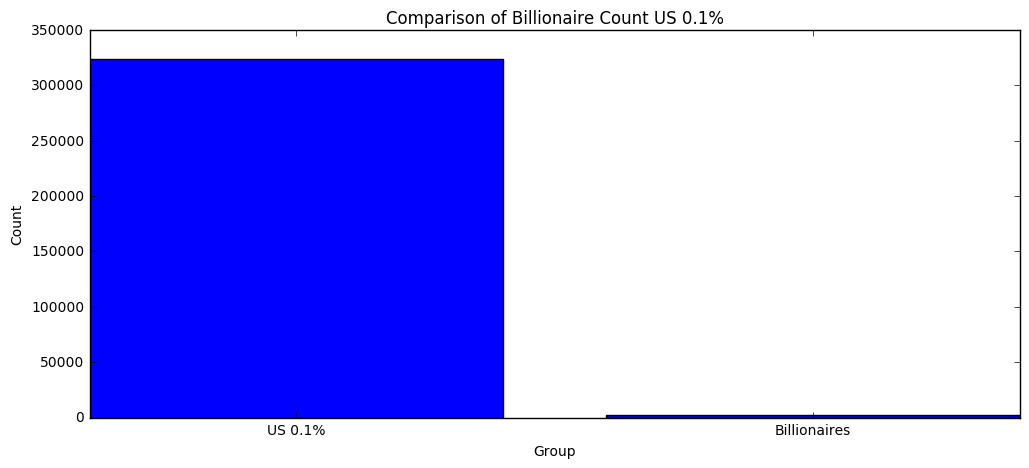

In [198]:
low_sorted_values = sorted_values[10:,:]

plt.bar(range(len(low_sorted_values)), low_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(low_sorted_values)), low_sorted_values[:,0])
plt.title("Comparison of Billionaire Count US 0.1%")
plt.xlabel("Group")
plt.ylabel("Count")

plt.show()

In [199]:
print("Billionaires are {:%} of the world population.".format(billionaire_count/world))

Billionaires are 0.000024% of the world population.


## Billionaire Money Amount

>How much money does the average/median billionaire have? How much do they all have combined? How does that compare to countries' GDPs, fortune 500 companies? How do they compare to each other?



Some interesting values to compare to:

* US GDP - [\$18,560 billion](https://en.wikipedia.org/wiki/Economy_of_the_United_States)
* China GDP - [\$11,400 billion](https://en.wikipedia.org/wiki/Economy_of_China)
* Apple Market Cap - [\$617.59 billion](https://ycharts.com/companies/AAPL/market_cap) (End 2016)
* Google Market Cap - [\$531.97 billion](https://ycharts.com/companies/GOOG/market_cap) (End 2016)
* Walmart Market Cap - [\$212.42 billion](https://ycharts.com/companies/WMT/market_cap) (End 2016)

In [141]:
billionaireMean = billionaires['Net Worth'].mean()
billionaireMedian = billionaires['Net Worth'].median()
billionaireSum = sum(billionaires['Net Worth'])

print("The average billionaire is worth ${} billion.".format(round(billionaireMean,2)))
print("The median billionaire is worth ${} billion.".format(round(billionaireMedian,2)))
print("Billionaires have a total of ${} billion".format(round(billionaireSum),2))

The average billionaire is worth $3.58 billion.
The median billionaire is worth $2.05 billion.
Billionaires have a total of $6483.0 billion


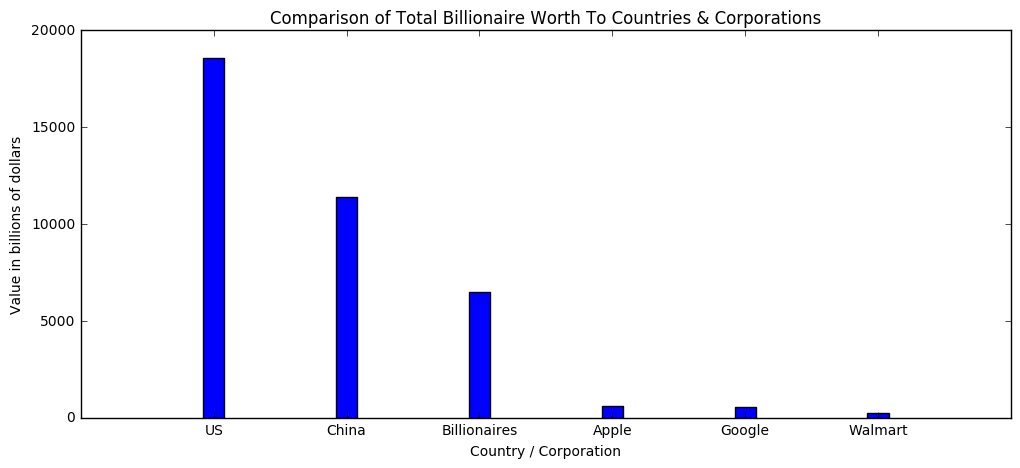

In [201]:
usGDP = 18560
chinaGDP = 11400
apple = 617.59
google = 531.97
walmart = 212.42

values = {
    "Billionaires": billionaireSum,
    "US": usGDP,
    "China": chinaGDP,
    "Apple": apple,
    "Google": google,
    "Walmart": walmart
}

sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(0,len(values)*5, 5), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(0,len(values)*5, 5), sorted_values[:,0])
plt.title("Comparison of Total Billionaire Worth To Countries & Corporations")
plt.xlabel("Country / Corporation")
plt.ylabel("Value in billions of dollars")

plt.show()

## Billionaires Per Country

>Which country has the most billionaires and how do they compare?

In [291]:
totalWorth = billionaires.groupby('Country of Citizenship')['Net Worth'].sum()
averageWorth = billionaires.groupby('Country of Citizenship')['Net Worth'].mean()
medianWorth = billionaires.groupby('Country of Citizenship')['Net Worth'].median()
count = billionaires.groupby('Country of Citizenship')['Net Worth'].count()

byCountry = pd.DataFrame({
    "Total": totalWorth,
    "Average": averageWorth,
    "Median": medianWorth,
    "Count": count
})

byCountry.head()

,Average,Count,Median,Total
Country of Citizenship,,,,
Algeria,3.100000,1,3.10,3.1
Angola,3.000000,1,3.00,3.0
Argentina,2.300000,4,1.85,9.2
Australia,2.468000,25,1.80,61.7
Austria,4.833333,6,2.50,29.0


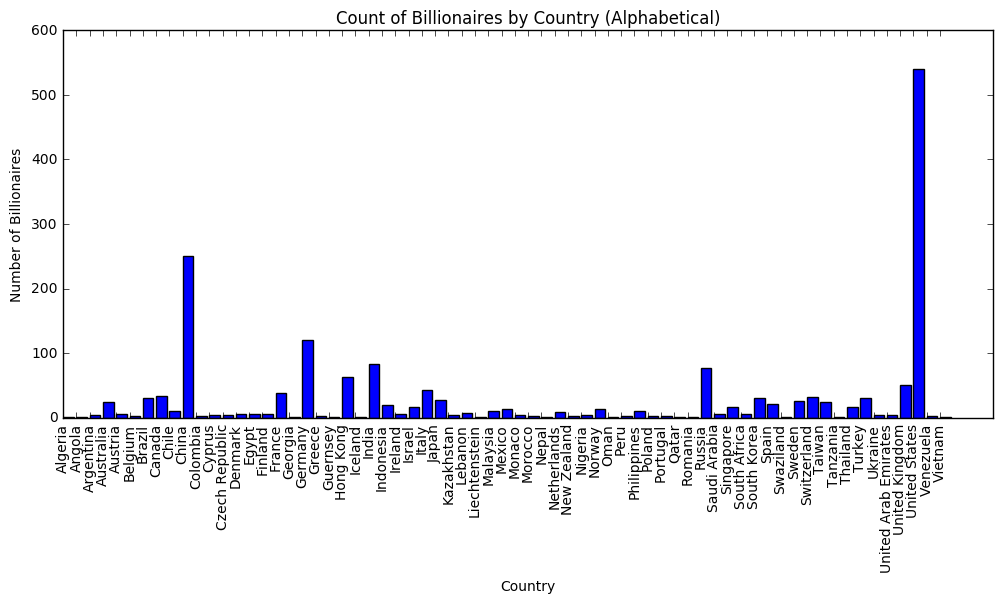

In [263]:
values = byCountry["Count"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Count of Billionaires by Country (Alphabetical)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

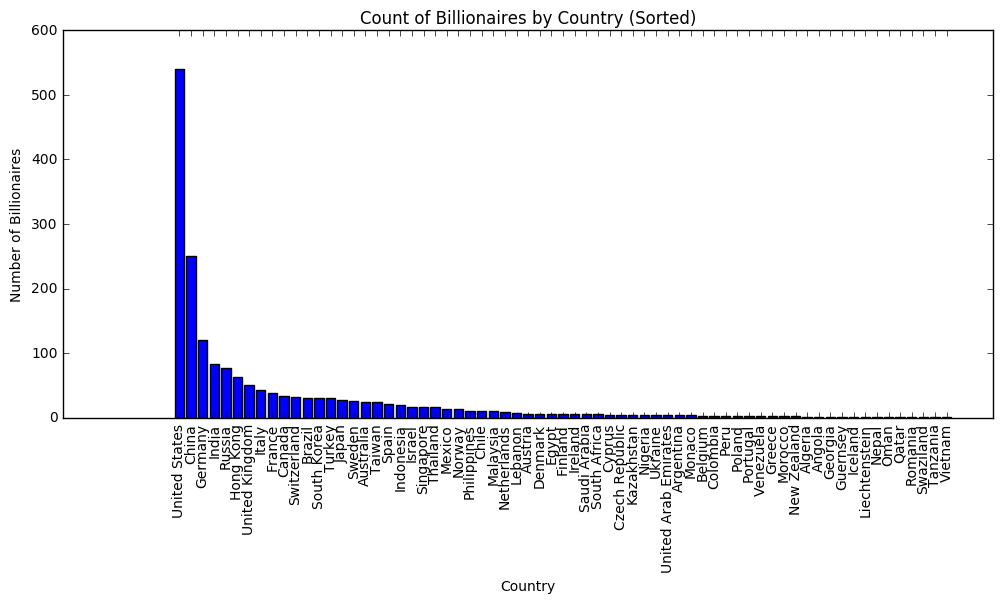

In [267]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(sorted_values)), sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(sorted_values)), sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Country (Sorted)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

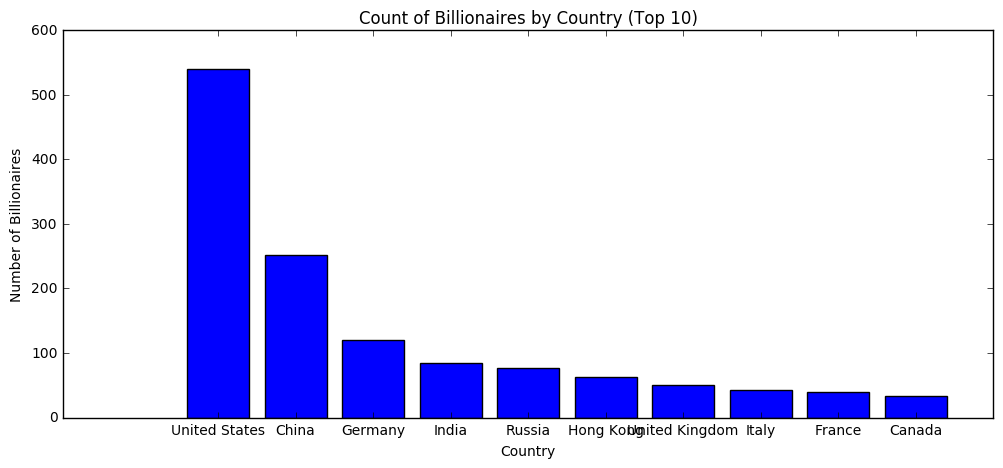

In [268]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0])

plt.title("Count of Billionaires by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

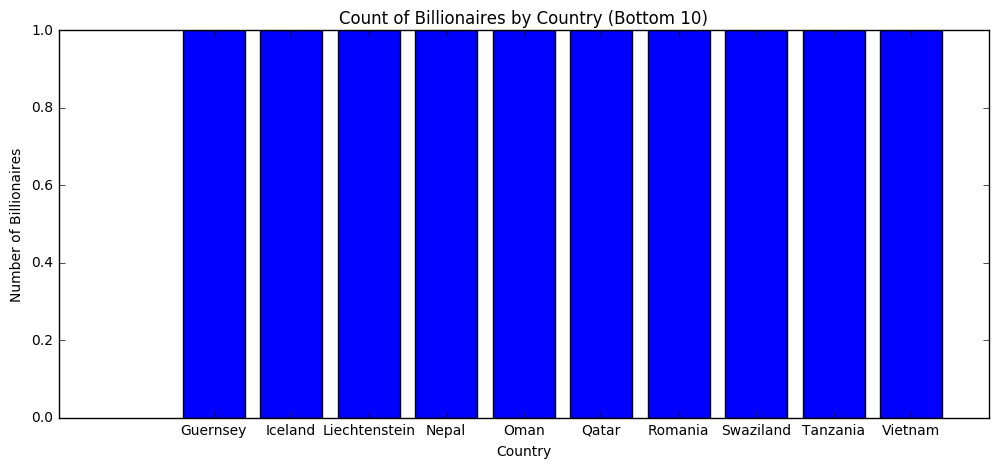

In [269]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(int), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0])

plt.title("Count of Billionaires by Country (Bottom 10)")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")

plt.show()

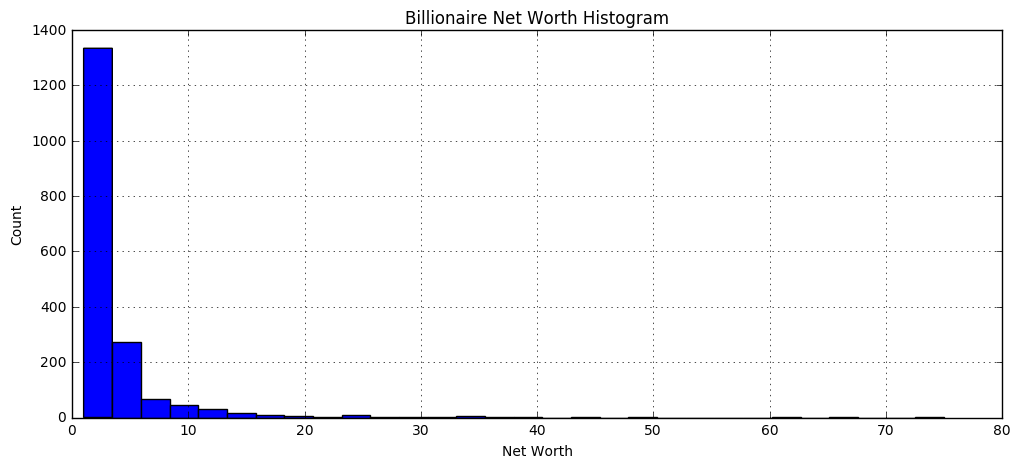

In [284]:
billionaires["Net Worth"].hist(bins=30)
plt.title("Billionaire Net Worth Histogram")
plt.xlabel("Net Worth")
plt.ylabel("Count")
plt.show()

In [285]:
overThirty = sum(billionaires["Net Worth"] > 30) / billionaireCount
overTwenty = sum(billionaires["Net Worth"] > 20) / billionaireCount
overTen = sum(billionaires["Net Worth"] > 10) / billionaireCount
overFive = sum(billionaires["Net Worth"] > 5) / billionaireCount
lessThanTwo = sum(billionaires["Net Worth"] < 2) / billionaireCount

print("{:%} of billionaires are worth more than $30 billion.".format(overThirty))
print("{:%} of billionaires are worth more than $20 billion.".format(overTwenty))
print("{:%} of billionaires are worth more than $10 billion.".format(overTen))
print("{:%} of billionaires are worth more than $5 billion.".format(overFive))
print("{:%} of billionaires are worth less than $2 billion.".format(lessThanTwo))

0.939227% of billionaires are worth more than $30 billion.
1.878453% of billionaires are worth more than $20 billion.
5.635359% of billionaires are worth more than $10 billion.
14.861878% of billionaires are worth more than $5 billion.
47.071823% of billionaires are worth less than $2 billion.


## Billionaires' Money Per Country

>Which country has the most money if we add all their billionaires together and how do they compare?


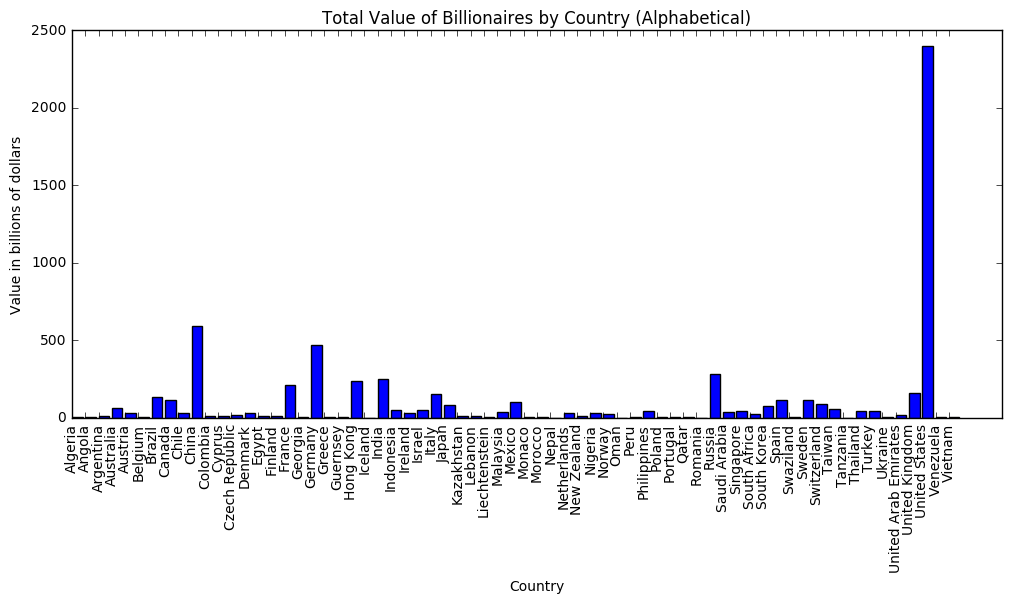

In [286]:
values = byCountry["Total"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Total Value of Billionaires by Country (Alphabetical)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")

plt.show()

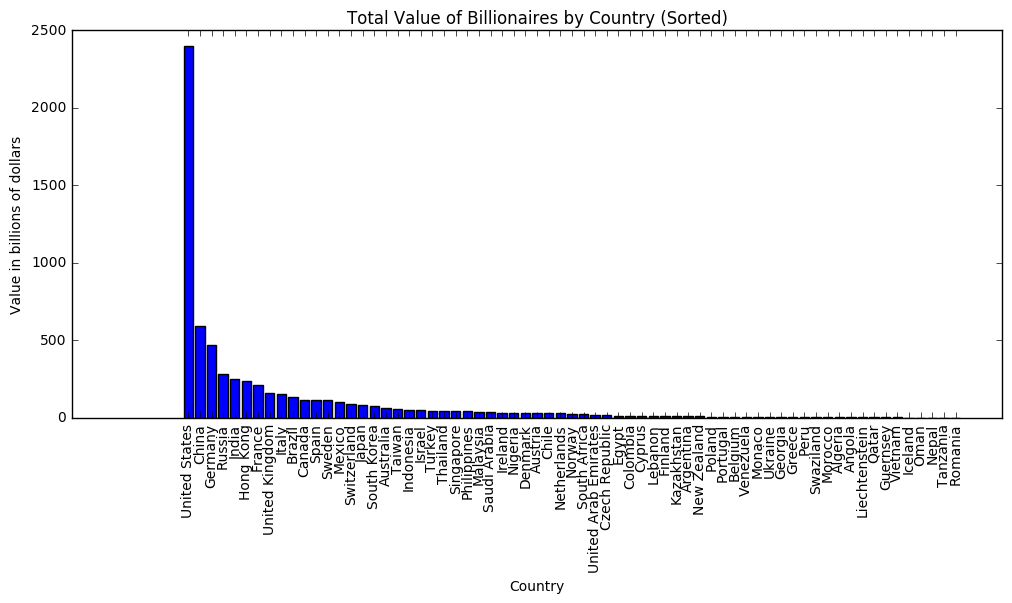

In [287]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(values)), sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Country (Sorted)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")


plt.show()

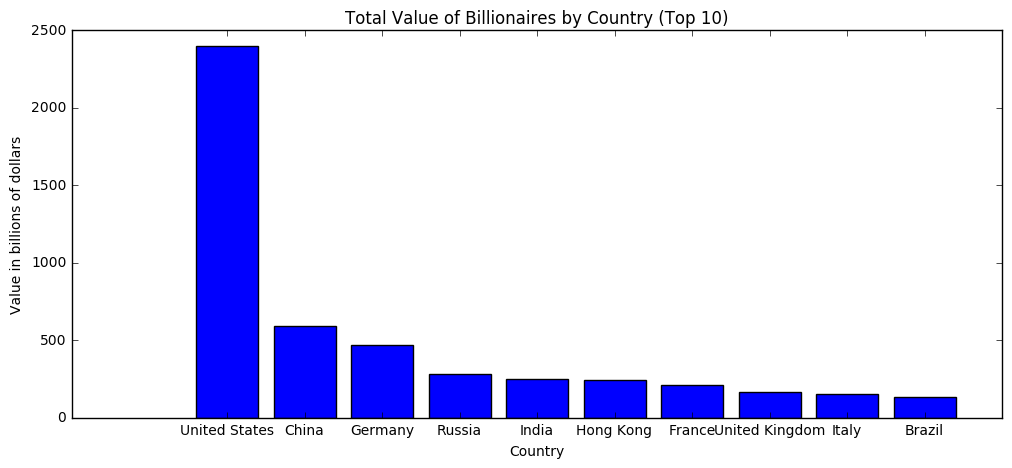

In [288]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0])

plt.title("Total Value of Billionaires by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")


plt.show()

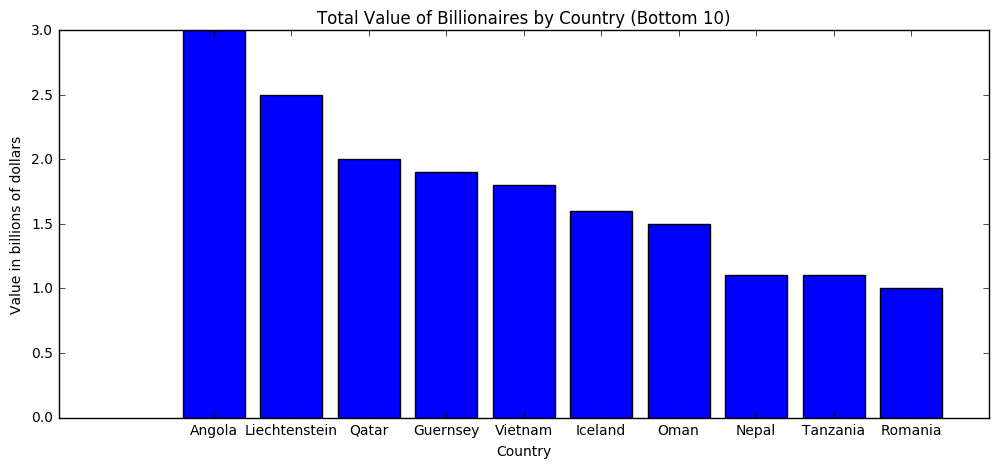

In [289]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0])

plt.title("Total Value of Billionaires by Country (Bottom 10)")
plt.xlabel("Country")
plt.ylabel("Value in billions of dollars")


plt.show()

## Billionaire Ages

>How does age correlate to how rich you are given that you are a billionaire? What is the distribution of billionaire's ages?


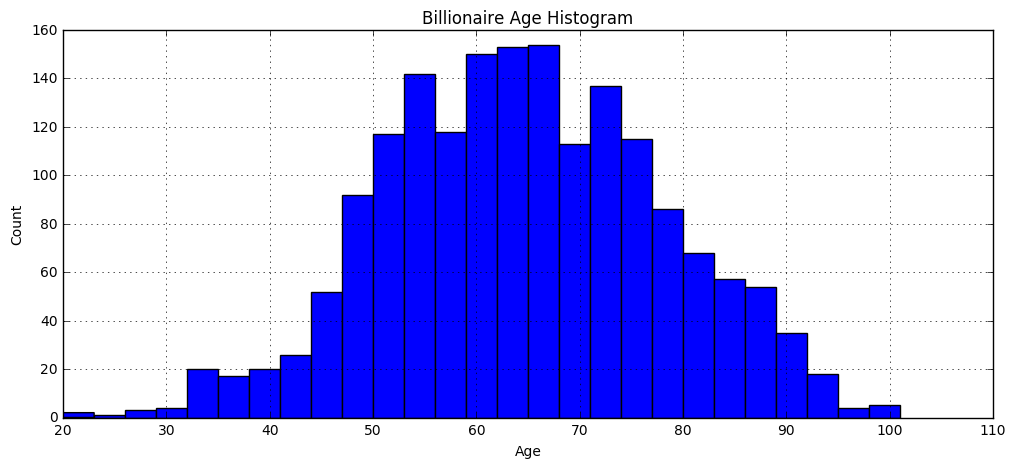

In [290]:
billionaires["Age"].hist(bins=27)
plt.title("Billionaire Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Billionaire Industries

>How does industry correlate to how rich you are given that you are a billionaire, and which industries have the most billionaires?


In [292]:
totalWorth = billionaires.groupby('Source')['Net Worth'].sum()
averageWorth = billionaires.groupby('Source')['Net Worth'].mean()
medianWorth = billionaires.groupby('Source')['Net Worth'].median()
count = billionaires.groupby('Source')['Net Worth'].count()

byIndustry = pd.DataFrame({
    "Total": totalWorth,
    "Average": averageWorth,
    "Median": medianWorth,
    "Count": count
})

byIndustry.head()

,Average,Count,Median,Total
Source,,,,
AOL,1.3,1,1.3,1.3
Airbnb,3.3,3,3.3,9.9
Airlines,2.5,2,2.5,5.0
"Aldi, Trader Joe's",20.3,1,20.3,20.3
Amazon.com,45.2,1,45.2,45.2


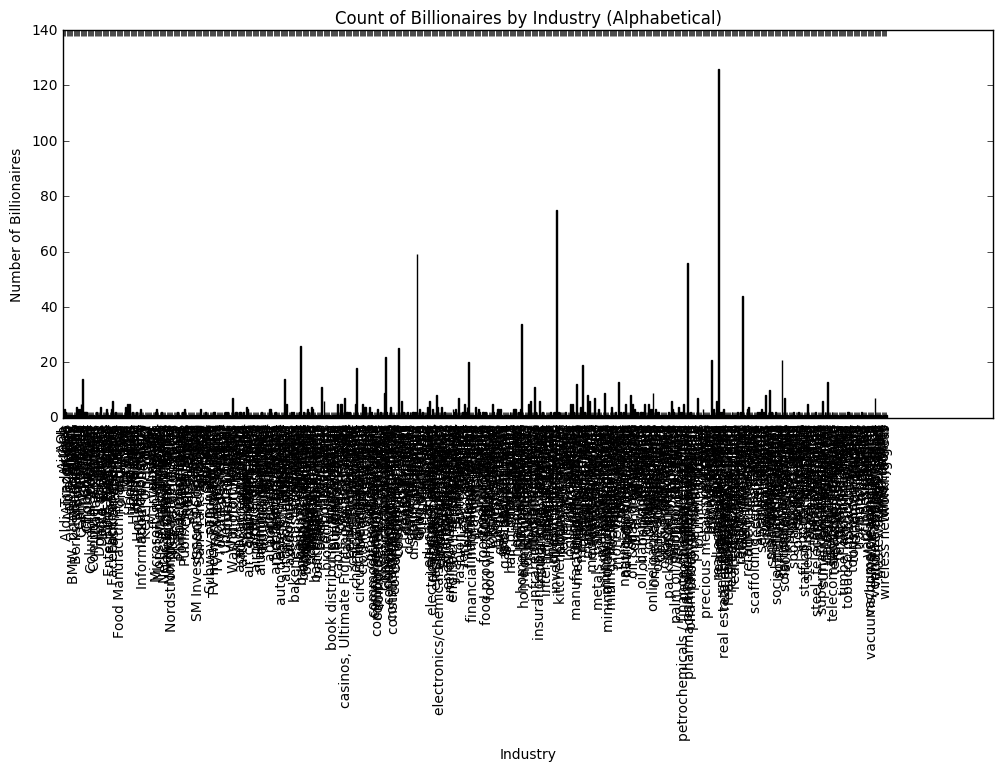

In [300]:
values = byIndustry["Count"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Count of Billionaires by Industry (Alphabetical)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")

plt.show()

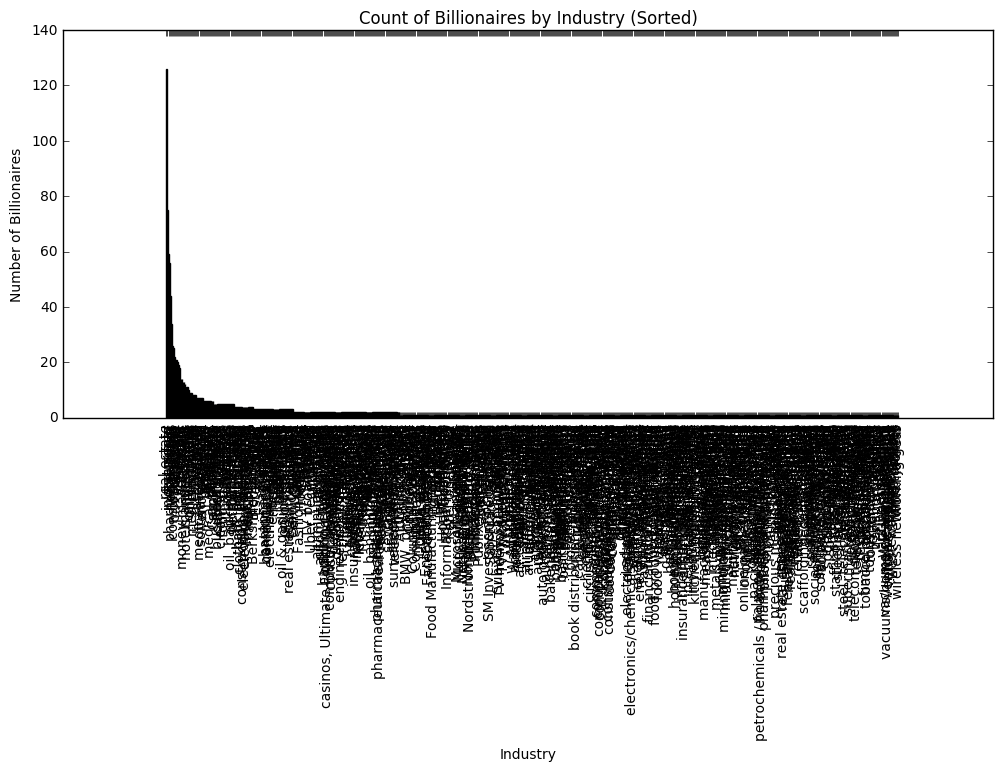

In [301]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(values)), sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry (Sorted)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")


plt.show()

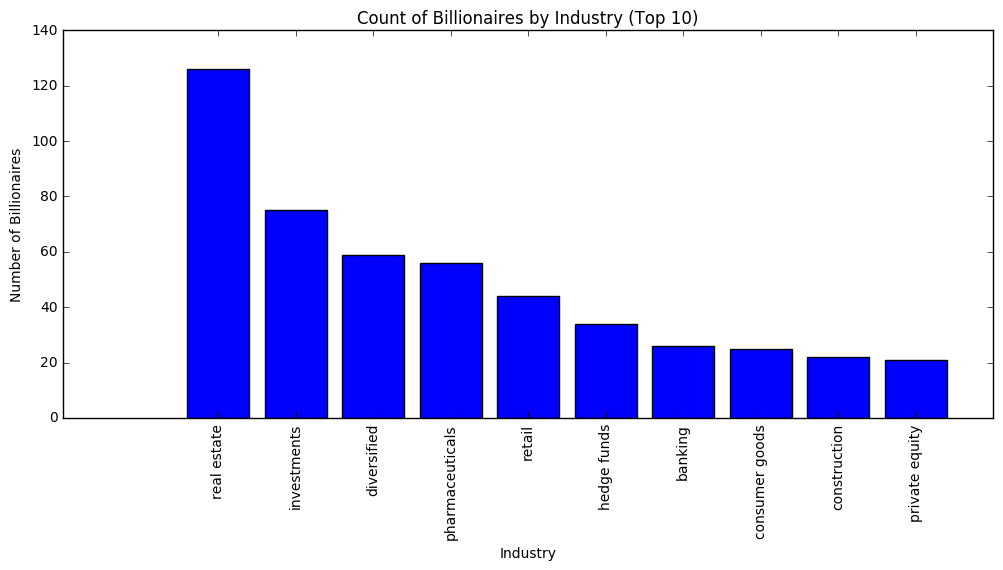

In [302]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry (Top 10)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")


plt.show()

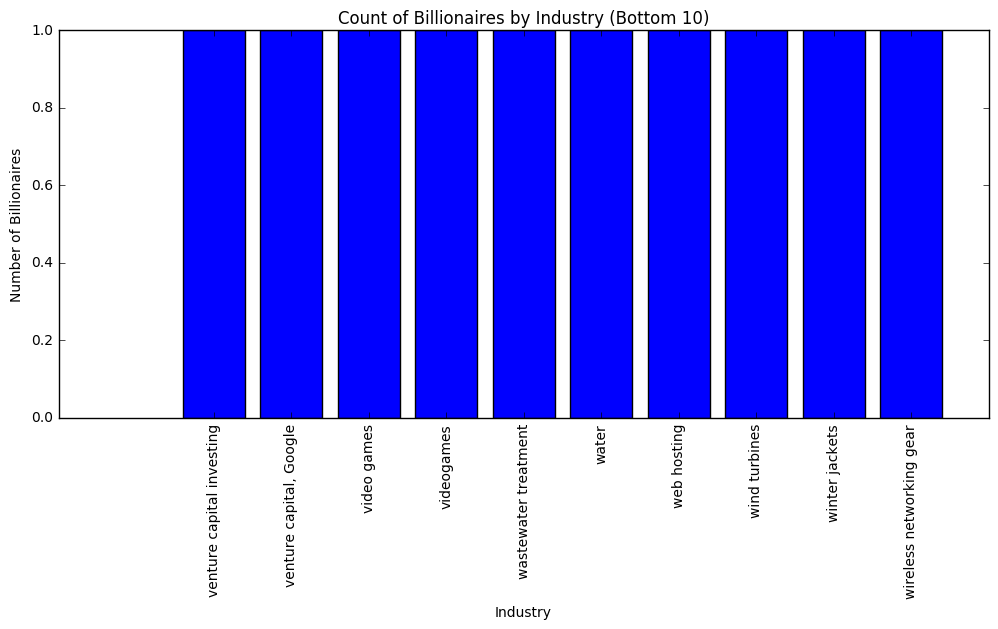

In [304]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0], rotation=90)

plt.title("Count of Billionaires by Industry (Bottom 10)")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")


plt.show()

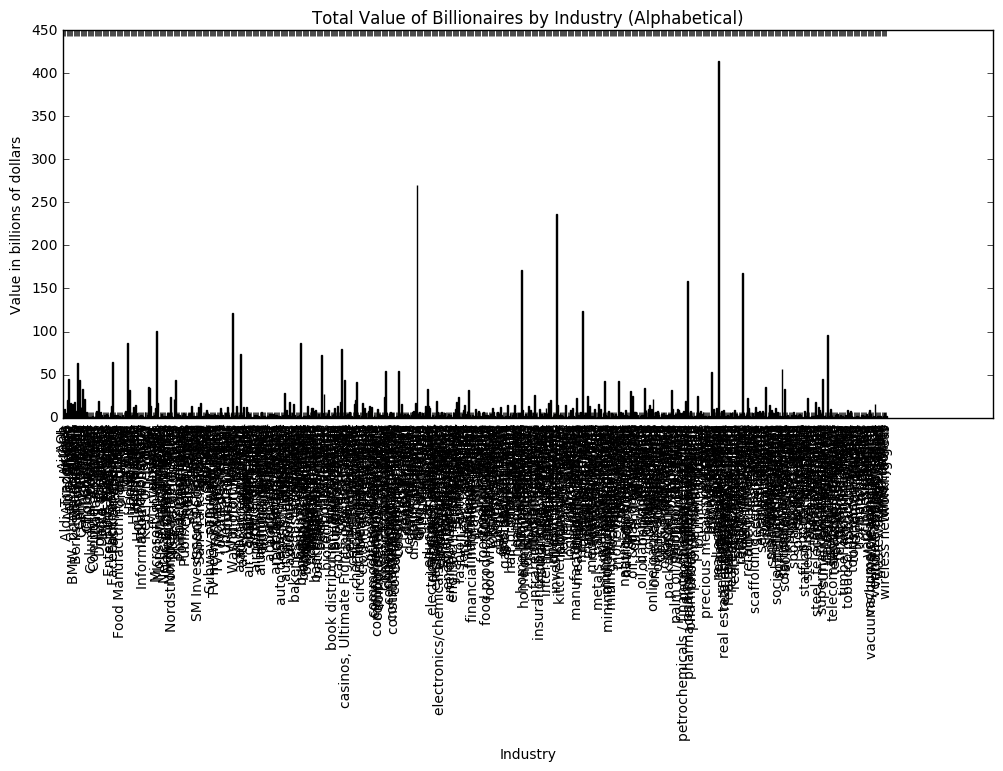

In [305]:
values = byIndustry["Total"]

plt.bar(range(len(values)), values)
plt.xticks(range(len(values)), values.keys(), rotation=90)

plt.title("Total Value of Billionaires by Industry (Alphabetical)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")

plt.show()

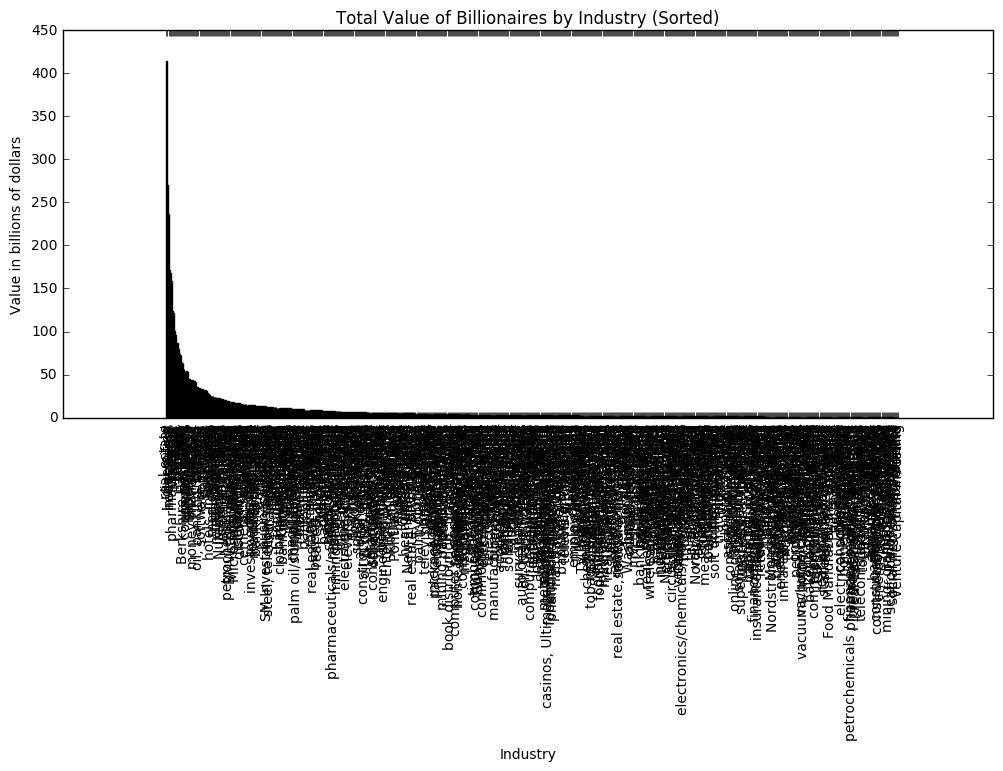

In [306]:
sorted_values = np.array(sorted(values.items(), key=operator.itemgetter(1), reverse=True))

plt.bar(range(len(values)), sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(values)), sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Industry (Sorted)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")


plt.show()

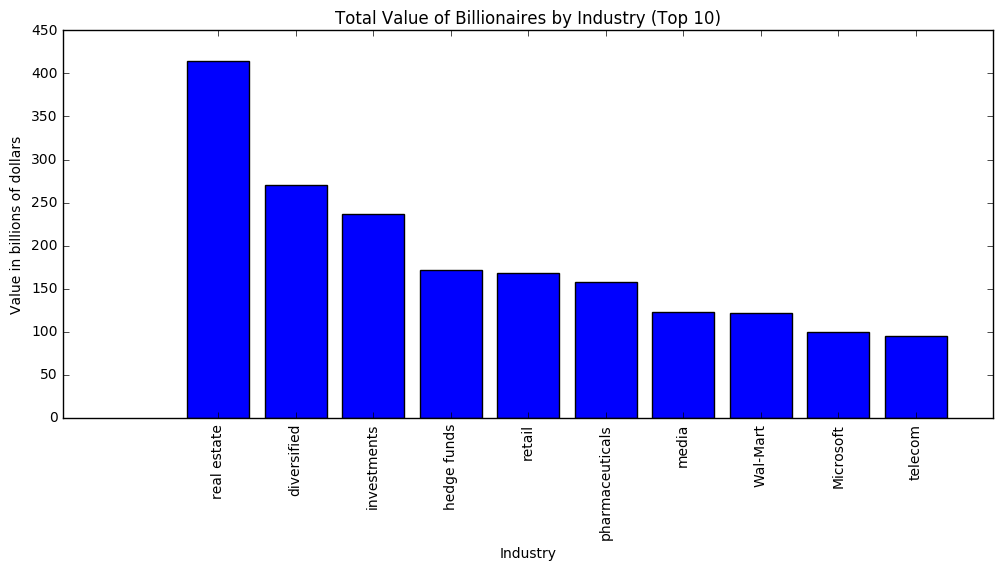

In [308]:
top_sorted_values = sorted_values[0:10,:]

plt.bar(range(len(top_sorted_values)), top_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(top_sorted_values)), top_sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Industry (Top 10)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")


plt.show()

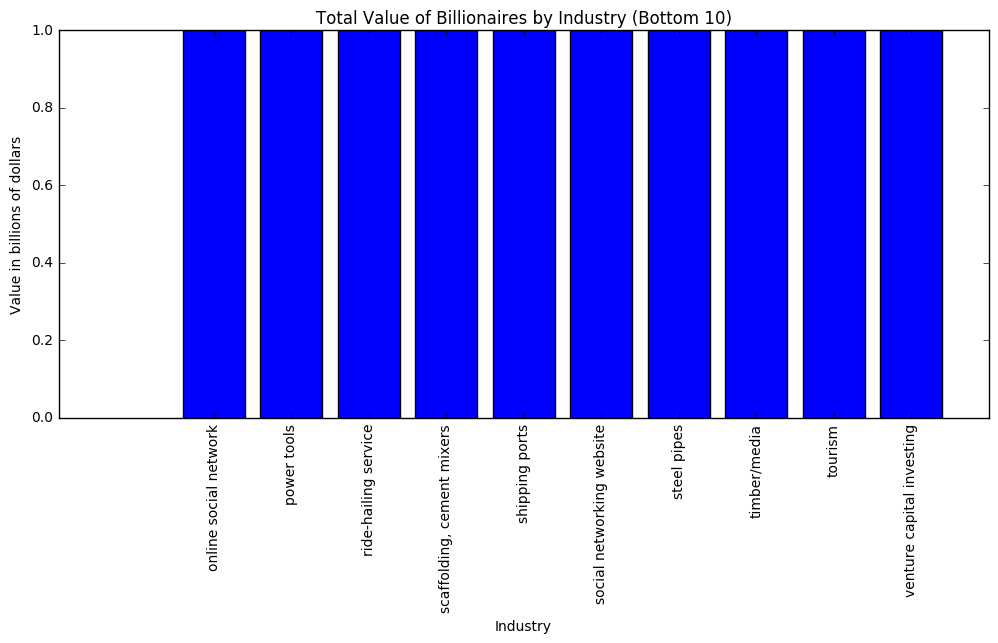

In [310]:
bottom_sorted_values = sorted_values[-10:,:]

plt.bar(range(len(bottom_sorted_values)), bottom_sorted_values[:,1].astype(float), align='center')
plt.xticks(range(len(bottom_sorted_values)), bottom_sorted_values[:,0], rotation=90)

plt.title("Total Value of Billionaires by Industry (Bottom 10)")
plt.xlabel("Industry")
plt.ylabel("Value in billions of dollars")


plt.show()

The source classifications in the dataset do not appear to be that great for grouping people. We may want to reclassify them into more useful groups.

In [325]:
industries = billionaires.groupby("Source").groups.keys()
print("There are {} industries listed, but we can probably re-categorize many of them.".format(len(industries)))
print("They are listed below: \n")

for i in industries:
    print(i, byIndustry["Count"][i])

There are 709 industries listed, but we can probably re-categorize many of them.
They are listed below: 

car dealerships 1
valve manufacturing 1
entertainment 3
Microsoft, investments 1
gas stations, utilities 1
home building materials 1
circus, live entertainment 1
Monster energy drinks 1
gas, chemicals 1
timber 1
kitchen, plumbing retailer 1
TV broadcasting 2
Pharmacies 1
construction, real estate 1
clothing retail 1
biotech, investments 1
furniture retailing 2
textiles, electronics 1
smartphone games 1
cement, sugar 1
SS&C Technologies 1
Marvel comics 1
hair products, tequila 1
fashion retail 7
electrical power equipment 1
television, Univision 1
trucking 1
communications 1
natural gas 5
sportswear 1
construction, pipes, banking 1
Gap 4
Nordic Aviation Capital 1
Dallas Cowboys 1
tobacco, banking 1
Dolce & Gabbana 1
coffee 4
online retail 2
Pontiac Land Group 1
smartphone screens 1
blood testing 1
television, real estate 1
beer, investments 1
construction, pipes, chemicals 1
BMW, ph

## Billionaire Genders

>How does gender correlate? Which countries have the most female billionaires and which have the highest percentage of female billionaries?


## Billionaire Industry Predictor

>Given that I am a [gender] from [country], what industry would I have pursued if I was a billionaire? What is the mean, median age for those billionaires?
